## This notebook for analyzing the servers performance results we gathered from the experiment ##

### Importing libraries ###

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set()

### Importing the results data ###

In [2]:
servers_performance = pd.read_csv("servers-performance-results.csv", index_col=0)
servers_performance

,MySQL/INSERT,MySQL/UPDATE,MSSQL/INSERT,MSSQL/UPDATE,PostgreSQL/INSERT,PostgreSQL/UPDATE
StatementID,,,,,,
1,12.372732,17.015457,29.235601,70.813656,0.996113,1.031160
2,2.008915,1.074076,0.871658,5.514383,0.000000,0.000000
3,0.000000,0.000000,0.000000,4.029989,0.000000,0.000000
4,1.008511,1.942635,0.000000,1.526594,1.010418,1.096010
5,1.086712,0.517130,1.347780,1.006603,0.000000,0.000000
...,...,...,...,...,...,...
196,2.008915,1.067400,2.024889,1.589060,1.053810,1.366138
197,1.056433,1.571655,2.103567,1.073360,0.000000,1.024485
198,2.020121,1.011610,1.839399,1.050711,1.011848,1.077890


In [3]:
servers_performance.describe()

,MySQL/INSERT,MySQL/UPDATE,MSSQL/INSERT,MSSQL/UPDATE,PostgreSQL/INSERT,PostgreSQL/UPDATE
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.785759,2.869992,2.338682,1.355826,0.653985,0.859050
std,8.148289,12.790483,4.354627,5.000003,0.527105,0.491343
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.514925,1.011431,1.010537,0.528038,0.000000,0.558197
50%,1.039982,1.063704,1.935124,1.052737,1.006126,1.051188
75%,2.009213,1.513839,2.050638,1.428306,1.026392,1.068175
max,114.890575,169.790506,32.122612,70.813656,2.349138,4.007816


### Analyzing the INSERT statement ###

#### It's obvious that the maximum value for INSERT across the 3 servers equals 114.89 msec for MySQL, so we set a threshold = 100 msec to see if there're many outliers or not ####

In [4]:
postgres_insert = servers_performance[servers_performance["PostgreSQL/INSERT"] < 100]["PostgreSQL/INSERT"]
mysql_insert = servers_performance[servers_performance["MySQL/INSERT"] < 100]["MySQL/INSERT"]
mssql_insert = servers_performance[servers_performance["MSSQL/INSERT"] < 100]["MSSQL/INSERT"]

print("After setting a threshold = 100 msec, the number of outliers in PostgreSQL Server = {}, while in MySQL = {} and MSSQL = {}"
      .format(len(servers_performance["PostgreSQL/INSERT"]) - len(postgres_insert),
              len(servers_performance["MySQL/INSERT"]) - len(mysql_insert),
              len(servers_performance["MSSQL/INSERT"]) - len(mssql_insert)))

After setting a threshold = 100 msec, the number of outliers in PostgreSQL Server = 0, while in MySQL = 1 and MSSQL = 0


In [5]:
# Let's investigate the outlier in MySQL
mysql_outlier = servers_performance[servers_performance["MySQL/INSERT"] > 100]["MySQL/INSERT"]
seconds = mysql_outlier.iloc[0]
index = servers_performance.index[servers_performance["MySQL/INSERT"] == seconds].tolist()[0]
print("It took {} msec, and happened after {} insertions".format(round(seconds, 3), index))

It took 114.891 msec, and happened after 16 insertions


#### Visualize the data after removing the outliers ####

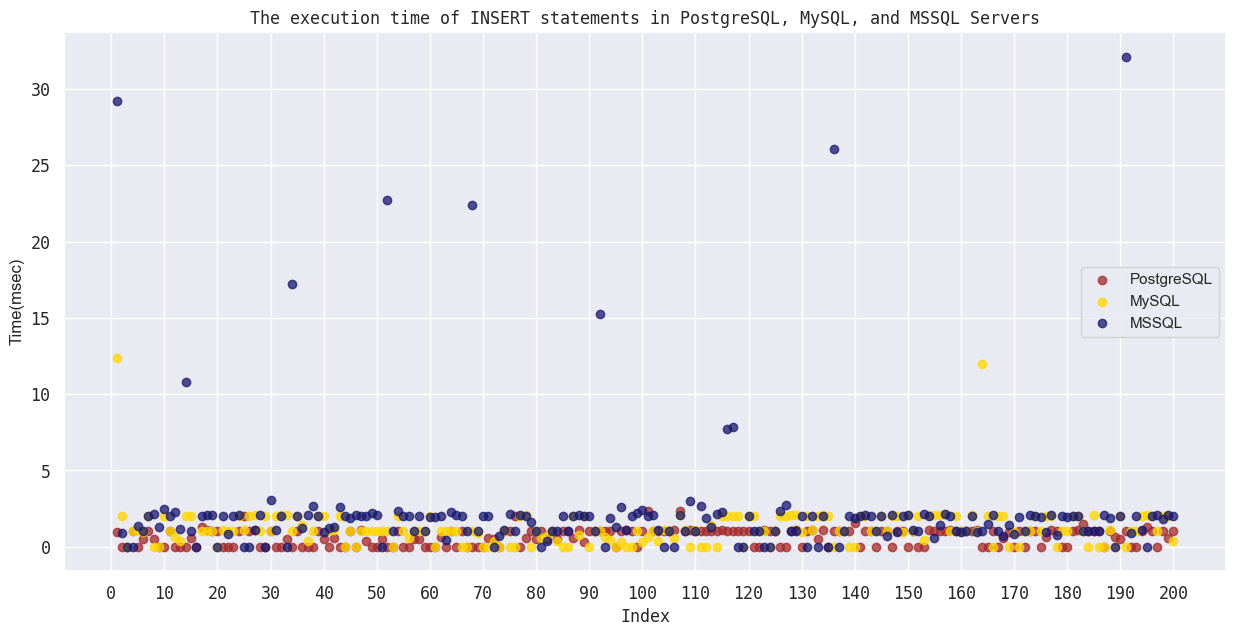

In [6]:
figure = plt.figure(figsize=(15, 7))
plt.scatter(postgres_insert.index, postgres_insert, color="brown", alpha=0.75)
plt.scatter(mysql_insert.index, mysql_insert, color="gold", alpha=0.75)
plt.scatter(mssql_insert.index, mssql_insert, color="midnightblue", alpha=0.75)
plt.title("The execution time of INSERT statements in PostgreSQL, MySQL, and MSSQL Servers", fontsize=15, font="monospace")
plt.xlabel("Index", fontsize=12, font="monospace")
plt.xticks(np.arange(0, 210, 10), fontsize=11, font="monospace")
plt.ylabel("Time(msec)")
plt.yticks(fontsize=11, font="monospace")
plt.legend(["PostgreSQL", "MySQL", "MSSQL"])
plt.show()

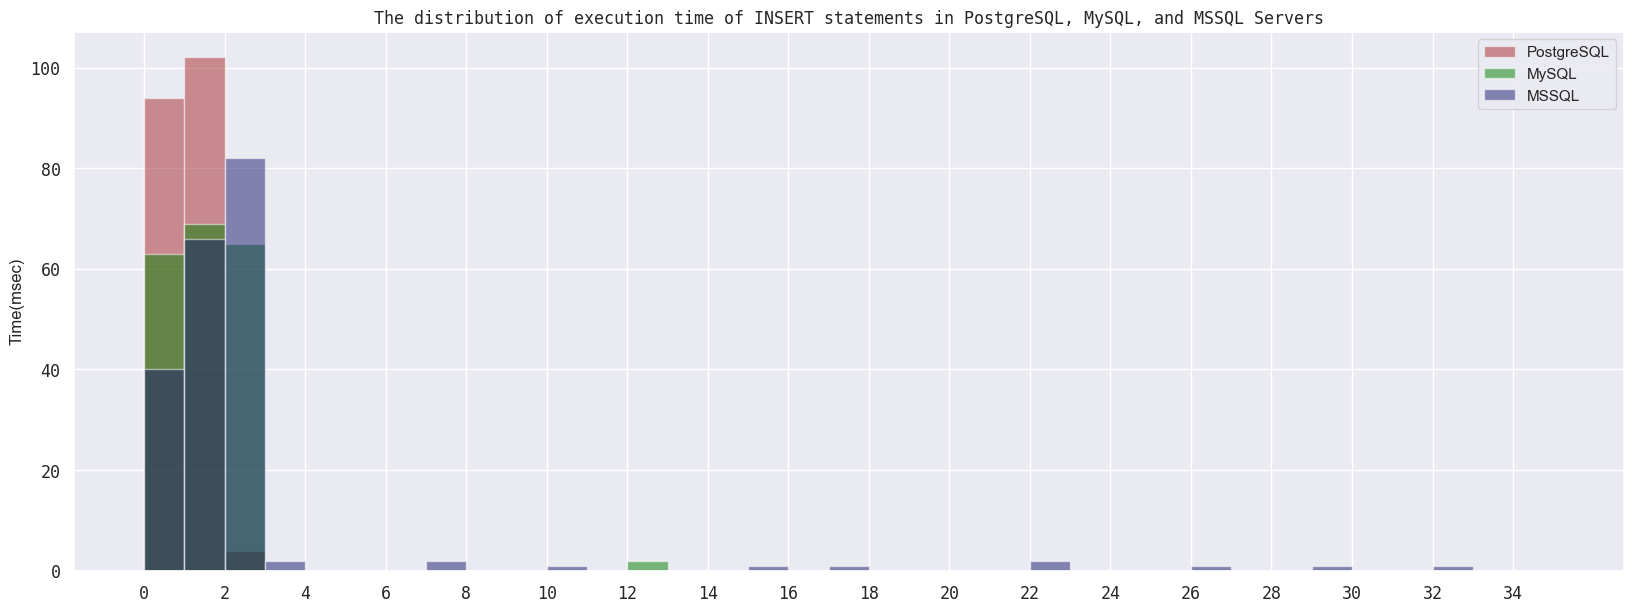

In [7]:
bins = np.linspace(0, 35, 36)

figure = plt.figure(figsize=(20, 7))
plt.hist(postgres_insert, bins=bins, color="brown", alpha=0.5)
plt.hist(mysql_insert, bins=bins, color="green", alpha=0.5)
plt.hist(mssql_insert, bins=bins, color="midnightblue", alpha=0.5)
plt.title("The distribution of execution time of INSERT statements in PostgreSQL, MySQL, and MSSQL Servers", fontsize=15, font="monospace")
plt.xticks(np.arange(0, 35, 2), fontsize=11, font="monospace")
plt.ylabel("Time(msec)")
plt.yticks(fontsize=11, font="monospace")
plt.legend(["PostgreSQL", "MySQL", "MSSQL"])
plt.show()

<hr>

### Analyzing the UPDATE statement ###

#### It's obvious that the maximum value for UPDATE across the 3 servers is nearly equal to 170 msec for MySQL, so we set a threshold = 50 msec to see if there're many outliers or not as the update process shouldn't take that much time ####

In [8]:
postgres_update = servers_performance[servers_performance["PostgreSQL/UPDATE"] < 50]["PostgreSQL/UPDATE"]
mysql_update = servers_performance[servers_performance["MySQL/UPDATE"] < 50]["MySQL/UPDATE"]
mssql_update = servers_performance[servers_performance["MSSQL/UPDATE"] < 50]["MSSQL/UPDATE"]

print("After setting a threshold = 50 msec, the number of outliers in PostgreSQL Server = {}, while in MySQL = {} and MSSQL = {}"
      .format(len(servers_performance["PostgreSQL/UPDATE"]) - len(postgres_update),
              len(servers_performance["MySQL/UPDATE"]) - len(mysql_update),
              len(servers_performance["MSSQL/UPDATE"]) - len(mssql_update)))

After setting a threshold = 50 msec, the number of outliers in PostgreSQL Server = 0, while in MySQL = 1 and MSSQL = 1


In [9]:
# Let's investigate the outlier in MySQL
mysql_update_outlier = servers_performance[servers_performance["MySQL/UPDATE"] > 100]["MySQL/UPDATE"]
seconds = mysql_update_outlier.iloc[0]
index = servers_performance.index[servers_performance["MySQL/UPDATE"] == seconds].tolist()[0]
print("It took {} msec, and happened after {} insertions".format(round(seconds, 3), index))

It took 169.791 msec, and happened after 193 insertions


In [10]:
# Let's investigate the outlier in MSSQL
mssql_update_outlier = servers_performance[servers_performance["MSSQL/UPDATE"] > 50]["MSSQL/UPDATE"]
seconds = mssql_update_outlier.iloc[0]
index = servers_performance.index[servers_performance["MSSQL/UPDATE"] == seconds].tolist()[0]
print("It took {} msec, and happened after {} insertions".format(round(seconds, 3), index))

It took 70.814 msec, and happened after 1 insertions


#### Visualize the data after removing the outliers ####

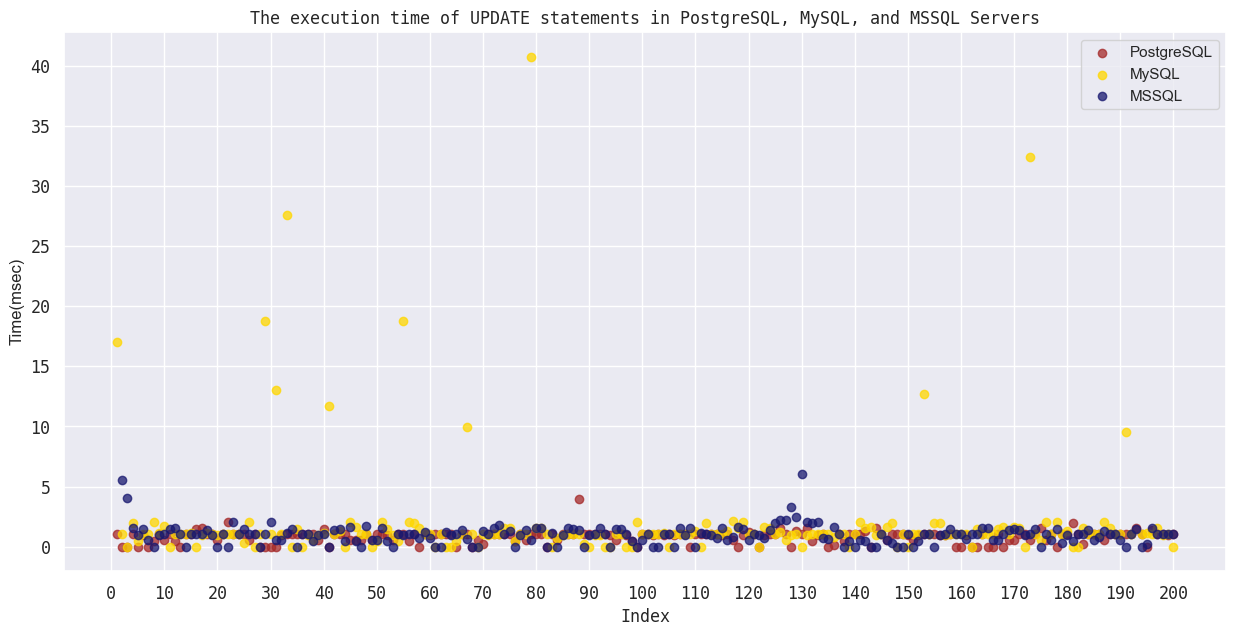

In [11]:
figure = plt.figure(figsize=(15, 7))
plt.scatter(postgres_update.index, postgres_update, color="brown", alpha=0.75)
plt.scatter(mysql_update.index, mysql_update, color="gold", alpha=0.75)
plt.scatter(mssql_update.index, mssql_update, color="midnightblue", alpha=0.75)
plt.title("The execution time of UPDATE statements in PostgreSQL, MySQL, and MSSQL Servers", fontsize=15, font="monospace")
plt.xlabel("Index", fontsize=12, font="monospace")
plt.xticks(np.arange(0, 210, 10), fontsize=11, font="monospace")
plt.ylabel("Time(msec)")
plt.yticks(np.arange(0, 45, 5), fontsize=11, font="monospace")
plt.legend(["PostgreSQL", "MySQL", "MSSQL"])
plt.show()

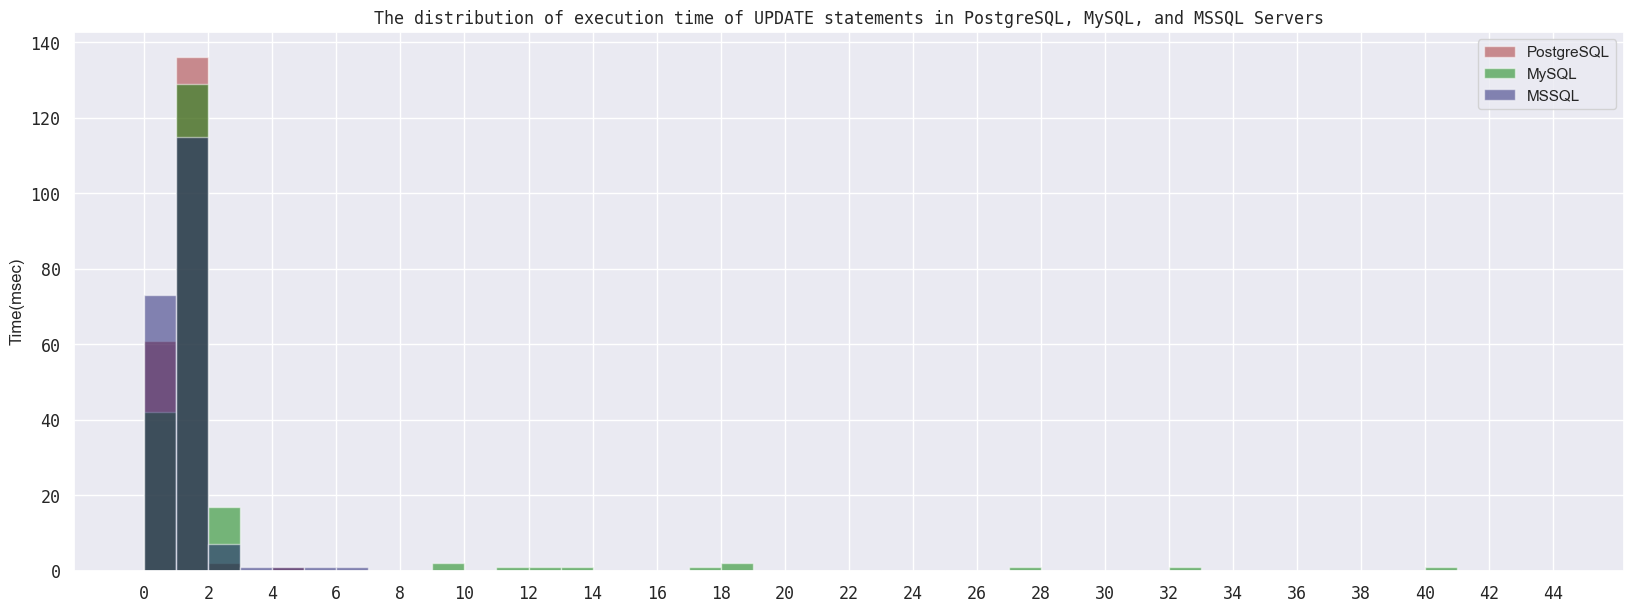

In [12]:
bins = np.linspace(0, 44, 45)

figure = plt.figure(figsize=(20, 7))
plt.hist(postgres_update, bins=bins, color="brown", alpha=0.5)
plt.hist(mysql_update, bins=bins, color="green", alpha=0.5)
plt.hist(mssql_update, bins=bins, color="midnightblue", alpha=0.5)
plt.title("The distribution of execution time of UPDATE statements in PostgreSQL, MySQL, and MSSQL Servers", fontsize=15, font="monospace")
plt.xticks(np.arange(0, 45, 2), fontsize=11, font="monospace")
plt.ylabel("Time(msec)")
plt.yticks(fontsize=11, font="monospace")
plt.legend(["PostgreSQL", "MySQL", "MSSQL"])
plt.show()

<hr>

### Insights ###

1. The scatter plots show us that __PostgreSQL__ is more stable than __MySQL__ and __MSSQL__ in INSERT and UPDATE as it has the least spread-out points while __MySQL__ and __MSSQL__ have some points which have very high execution time compared to its execution time.
2. This histograms show us that __PostgreSQL__ didn't exceed `4 msec` in insertion new records and `2 msec` in updating the existing records, while __MySQL__ and __MSSQL__ executed _many_ queries in more than `10 msec`!